# <center> California Housing Prices </center>

<div style="text-align:center;">
    <img src="./house.jpeg" alt="photo_house" style="width:50%;">
</div>

Tu primera tarea será utilizar el censo de California para crear un modelo de precios de casas en el estado. Estos datos incluyen métricas como la población, los ingresos medios y los precios medios de las casas para cada grupo de bloques en California. Los grupos de bloques son la unidad geográfica más pequeña para la Oficina de censo de EE.UU. publica datos simples (un grupo de bloques suele tener una población de entre 600 y 3.000 personas). Por acortar, vamos a llamarlos distritos.

El modelo debería aprender a partir de estos datos y ser capaz de predecir el precio medio de las casas en cualquier distrito si se le dan todas las demás métricas.

### Objetivo

El objetivo de este proyecto es introducir la salida del modelo en otro sistema de machine learning, junto con muchas otras señales. Este sistema descendete determinará si merece la pena invertir en un área determinada o no. Hacer bien este proceso es fundamental, ya que afectará directamente a los ingresos.

| Variable          | Descripción                                                                                   |
|-------------------|-----------------------------------------------------------------------------------------------|
| longitude         | Medida de cuán al oeste está una casa; un valor más alto está más al oeste                    |
| latitude          | Medida de cuán al norte está una casa; un valor más alto está más al norte                     |
| housingMedianAge  | Edad mediana de una casa dentro de una manzana; un número más bajo indica un edificio más nuevo |
| totalRooms        | Número total de habitaciones dentro de una manzana                                              |
| totalBedrooms     | Número total de dormitorios dentro de una manzana                                                |
| population        | Número total de personas que residen dentro de una manzana                                       |
| households        | Número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda, para una manzana |
| medianIncome      | Ingreso mediano para hogares dentro de una manzana de casas (medido en decenas de miles de dólares estadounidenses) |
| medianHouseValue  | Valor mediano de la casa para hogares dentro de una manzana (medido en dólares estadounidenses) |
| oceanProximity    | Ubicación de la casa con respecto al océano/mar                                                |


### Exploración primária o simple del conjuto de datos

In [54]:
# Integra los gráficos en el propio documento
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("./housing.csv",delimiter=",")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# Observamos las distintas categorias del atributo ocean_prximity
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
# observamos los atributos numéricos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Observamos valores atípos positivos cercanos al valor máximo
print(df["housing_median_age"].value_counts())
print(df["median_house_value"].value_counts())

housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64
median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

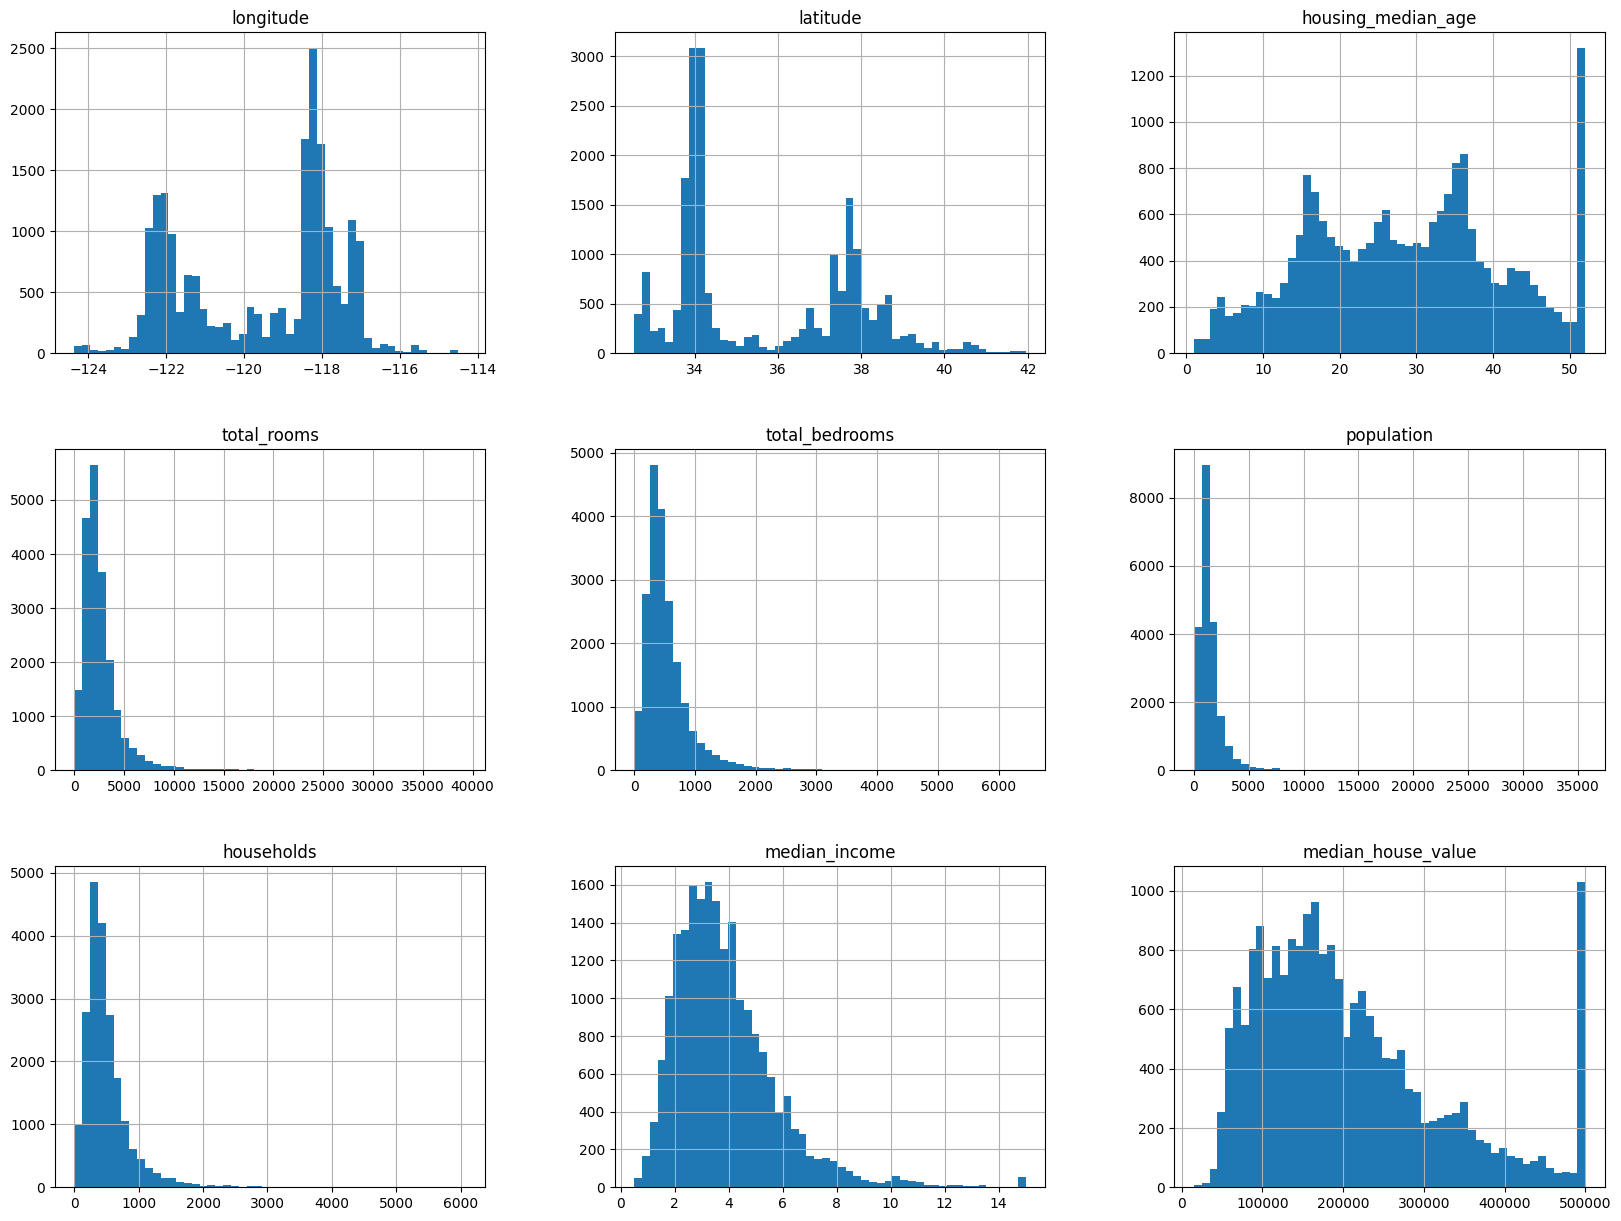

In [6]:
# histograma exploratorio de atributos numéricos
df.hist(bins=50, figsize=(20,15))


- **median_income**: Los datos recopilados sobre los ingresos medios por hogar, no estan expresados en miles de dolares. En su lugar, se han escalado y limitado a 15 (que serían 15,000$) los más elevados y en 0,5 (que serían 0,49$) para ingresos bajos.
- **housing_median_age & median_house_value**: también han sido limitados. Esto puede ser un problema ya que **median_house_value** es nuestra etiqueta, es decir, la variable objetivo dependiente.

### Creación del conjunto de prueba - Muestreo Simple

Generamos un conjunto de prueba típico creando una función que divide el set de datos en dos grupos, **train_set** 80% y **test_set** 20%.
Podemos realizar el mismo ejercicio utilizando la libreria skylearn en su módulo **train_test_split**

In [7]:
# Establezco la semilla
np.random.seed(42)

# Muestreo puramente aleatorio
def split_train_test(data, test_ratio:float):
    '''Divide el dataframe data en dos dataframe, en función del test_ratio'''
    random_index = np.random.permutation(len(data)) # genera un índice de valores aletorios en forma de array numpy
    test_set_size = int(len(data) *  test_ratio) # calcula el tamaño del conjunto de datos de prueba
    test_index = random_index[:test_set_size] # captura los primer resutados para el conjunto de prueba
    train_index = random_index[test_set_size:] # captura el resto de resultados para el conjunto de entramiento
    return data.iloc[train_index], data.iloc[test_index] # devuelvo ambos resultados

train_set, test_set = split_train_test(df,0.2)
print(f"Tamaño conjunto Entrenamiento: {len(train_set)}")
print(f"Tamaño conjunto Prueba: \t{len(test_set)}")

Tamaño conjunto Entrenamiento: 16512
Tamaño conjunto Prueba: 	4128


In [8]:
# alternativa para generar un nuestreo puramente aleatorio usando skylearn
# train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

Sabemos que la variable **median_income** es un atributo muy importante y necesitamos asegurarnos que el conjunto de pruebas es representativo de las diferentes categorías de ingresos en el conjunto de datos completo.
Puesto que **median_income** es una variable numérica es necesario crear un nuevo atributo categórico **median_categoric** que incluya los valores de **median_income** en diferentes intervalos categóricos

In [9]:
#  divide los valores en intervalos específicos y asignando una etiqueta categórica a cada valor en función de en qué intervalo cae
df["median_categoric"] = pd.cut(df["median_income"], bins=[0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_categoric
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


<Axes: >

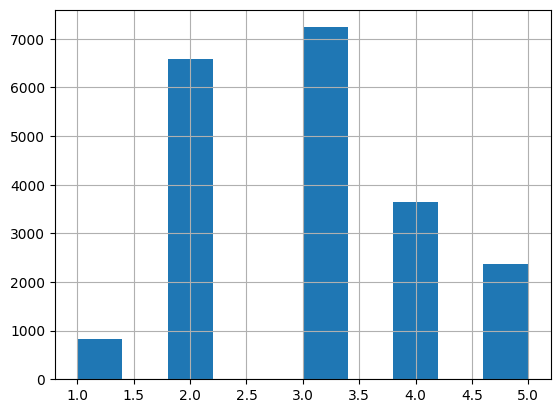

In [10]:
df["median_categoric"].hist()

### Creación del conjunto de prueba - Muestreo Estratificado

Generamos el conjunto de prueba usando la técnica de estratificación para asegurarnos que nuestros datos de entrenamiento tengan una representación acorde al atributo **median_categoric**

In [11]:
# Técnica del Muestro Estratificado
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["median_categoric"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Proporción de ocurrencias de cada valor único en relación con el tamaño total del conjunto de datos de entrenamiento.
print(f"Test: {strat_test_set['median_categoric'].value_counts() / len(strat_test_set)}")
print(f"Número instancias: {len(strat_test_set)}")
print("-"*70)
print(f"Train: {strat_train_set['median_categoric'].value_counts() / len(strat_train_set)}")
print(f"Número instancias: {len(strat_train_set)}")

Test: median_categoric
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
Número instancias: 4128
----------------------------------------------------------------------
Train: median_categoric
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
Número instancias: 16512


In [12]:
print(strat_train_set.columns)
print(strat_test_set.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_categoric'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_categoric'],
      dtype='object')


In [13]:
# elimino la columna median_categoric de ambos sets de datos, ya que no la voy a necesitar
for set_ in(strat_train_set, strat_test_set):
    set_.drop("median_categoric", axis=1, inplace=True)

### Exploración Profunda de los Datos

A partir de ahora, vamos a trabajar con el dataframe de entrenamiento. Para ello guardamos el datafram original en una nueva posición de memoria, (por si más adelante lo necesitamos) y el dataframe de entramiento lo almacenamos en la varaible df que estávamos utilizando

In [14]:
df_original = df.copy() # creo una copia del datafram original y la guardo en una nueva posición de memoria
# Contiene los datos de entrenamiento
df = strat_train_set.copy() # creo una copia del datafram de entrenamiento y la guardo en una nueva posición de memoria

In [15]:
# Mapa de dispersión interactivo o scatter_mapbox - utilizando Plotly Express y Mapbox
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    zoom=4,
    height=400,
    hover_name=df["longitude"].astype(str) + ", " + df["latitude"].astype(str),  # Combinación de longitude y latitude
    color_discrete_sequence=["red"],
    hover_data={"latitude", "longitude"}
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


<Axes: xlabel='longitude', ylabel='latitude'>

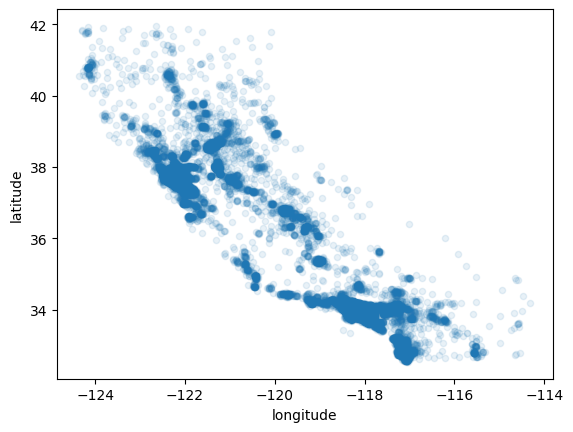

In [16]:
# genero un diagrama de dispersión  para visualizar todos los distritos de California
# scatter = diagrama dispersión
# alpha añade transparencia para ver los lugares con mayor densidad (mayor acumulación de datos)
df.plot(kind="scatter", x ="longitude", y="latitude", alpha=0.1)

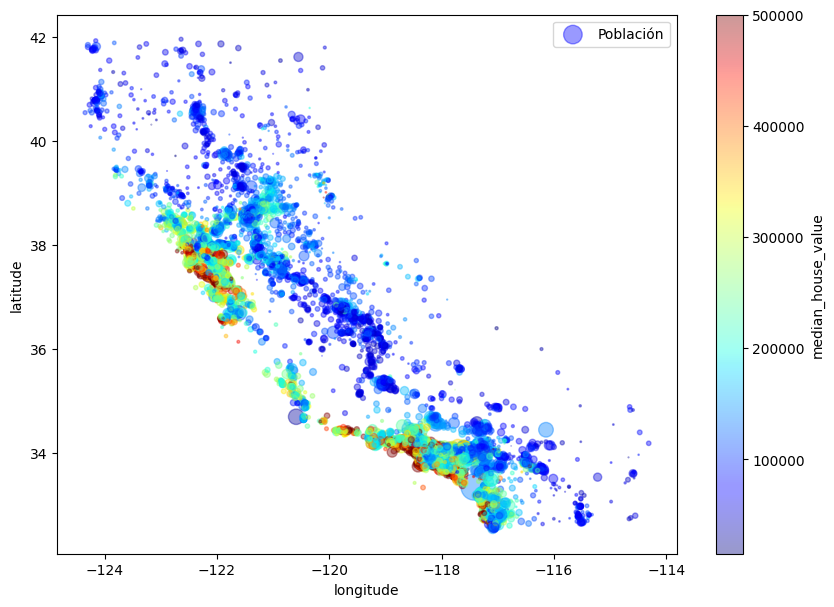

In [17]:
df.plot(kind="scatter", x ="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="Población", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
        )
plt.legend()

Esta imagen nos indica que los precios de las casas están muy relacionadas con la ubicación, por ejemplo, cuanta mayor es su proximidad al océano, mayor es el precio de la vienda. (Tiene tonos de color mas cercanos al verde, amarillo, naranja y rojo)
Tambíen podemos observar como en las zonas costeras, tenemos un mayor índice de población, es decir tenemos mayor cantidad de puntos y de mayor tamaño.

### Correlaciones

In [18]:
# Coeficiente de Correlación estándar - r de Pearson
# genero una nueva variable que solo tenga atributos numéricos
numeric_df = df.select_dtypes(include=["float64"])
corr_matrix = numeric_df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


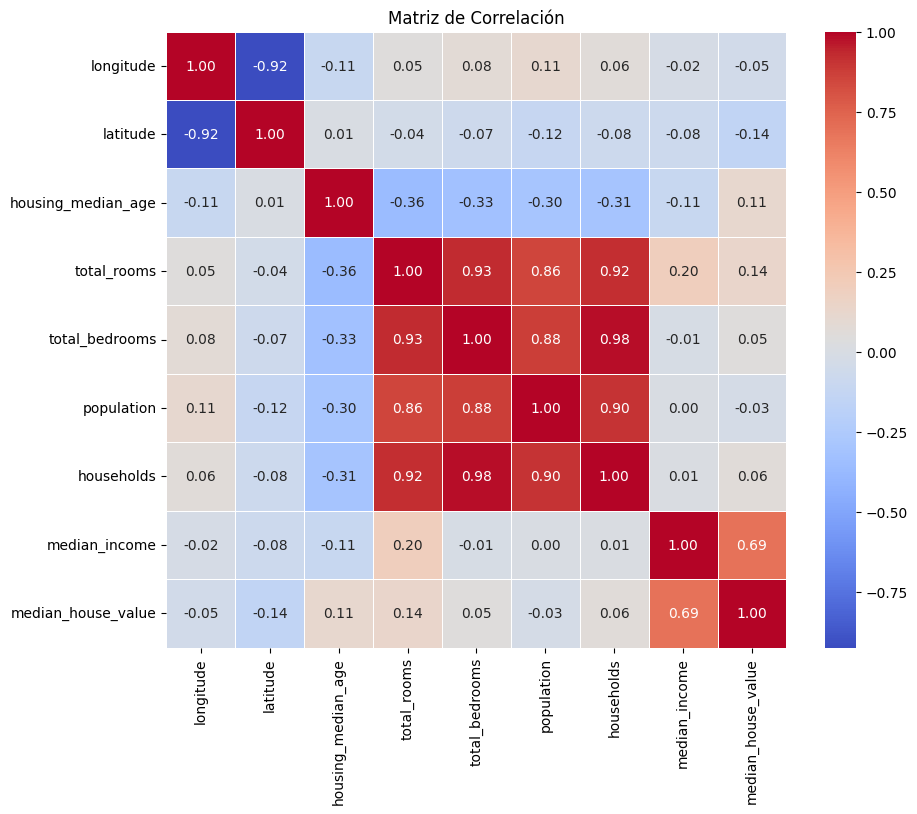

In [19]:
# Mapa de Calor de la matrix de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()


In [20]:
# Muestro los valores de correlacion del atributo median_house_value ordenados de forma descendente
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Observamos una correlación positiva, entre el valor medio de las casas **median_house_value** y los ingresos medios de las personas que residen en ellas **median_income** esto se traduce en que cuanto mayor es el precio medio de la vivienda, mayores son los ingresos medios de las familias que los habitan.

Tambíen se observa una ligera correlación entre **median_house_value** y **latitude** que nos indica que cuando mayor es el precio medio de la vivienda, más cerca se encuentra del oceano.


Una forma alternativa de comprobar la correlación es utilizar la función **scatter_matrix** de Pandas, que traza cada atributo numérico frente a otro atributo numérico. Puesto que tenemos 11 atributos numéricos, obtendriamos 11 elevado a la 2 = 121 gráficos. Como esto es dificil de representar, creamos la variable **atributes** para seleccionar los atributos más prometedores.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

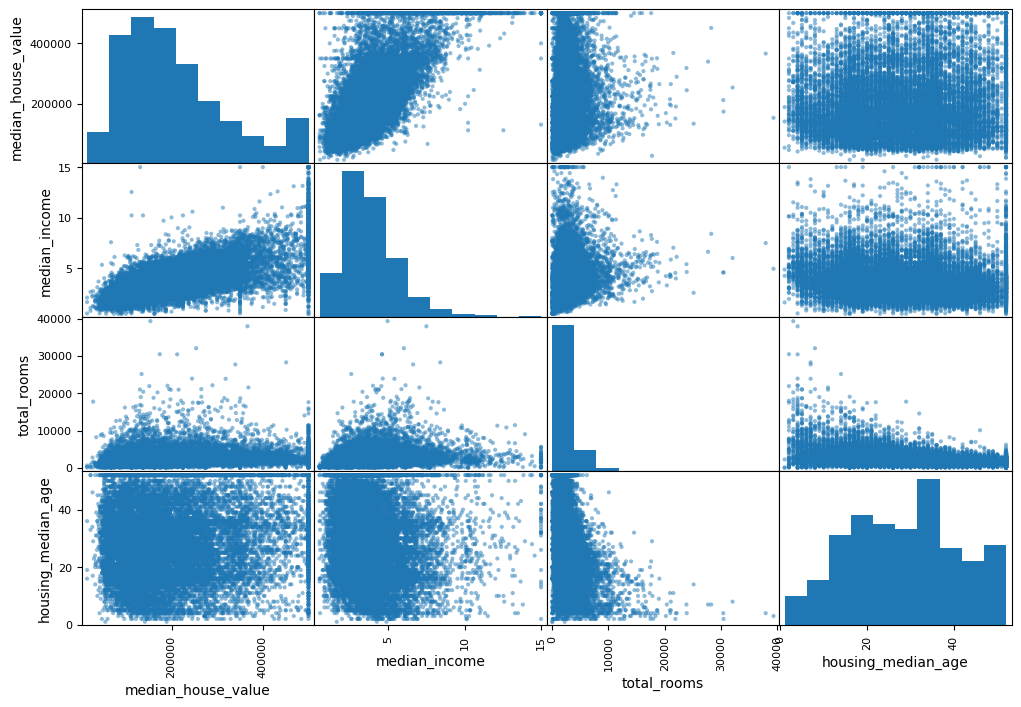

In [21]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

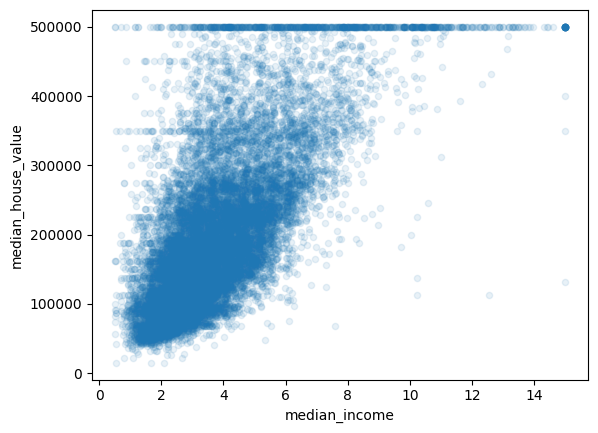

In [22]:
# Hacemos zoom sobre la correlación más interesante median_income vs median_house_value
df.plot(kind="scatter", x="median_income", y ="median_house_value", alpha=0.1)

Este gráfico revela varias cosas:
- La correlación es fuerte, se puede ver claramente la tendencia ascendente y los puntos no están muy dispersos.
- Hay un límite de precio establecido en 500.000$.
- Se observan otras líneas rectas alrededor de los valores 450.000$, 350.000$, 280.000$ y algunas más por debajo de estos valores.

Podría ser interesante eliminar estos valores para que el algoritmo no aprende a reproducir estas singularidades

### Ingenieria de Características

Generamos una serie de nuevos atributos que pueden resultar interesantes para el algoritmo.
- Número de habitaciones por vivienda
- Número de dormitorios por habitación.
- Número de personas por vivienda

In [23]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [24]:
# Coeficiente de Correlación estándar - r de Pearson
# genero una nueva variable que solo tenga atributos numéricos ya que el dataframe contiene una variable categórica
numeric_df = df.select_dtypes(include=["float64"])
corr_matrix = numeric_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Podemos observar que tras realizar ingenieria de características, la nueva variable **bedroms_per_room** presenta una correlación negativa con **median_house_value**. Esto indica que cuanto menos dormitorios tiene una vivienda, más aumenta el precio de la misma.

## Adecuación de los Datos hacia el Modelo de Machine Learning

### Limpieza de Datos

valor objetivo = **median_house_value**

In [25]:
df = strat_train_set.drop("median_house_value", axis=1) # resto del dataframe
df_labels = strat_train_set["median_house_value"].copy() # Contiene las etiquetas - Valores objetivo

In [26]:
# Dataframe con todas las transformaciones realizadas hasta el momento
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [27]:
# Contiene la variable target
df_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

Como vimos anteriomente, la caractetística **total_bedrooms** presenta valores vacios. Con el objetivo de mantener el mayor número de isntancias para el entrenamiento del algoritmo, vamos a sustituir los valores faltantes con el valor medio.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Utilizar una técnica convencional para obtener la media de las instancias faltantes

In [29]:
# Técnica convencional para agregar la media en las instancias vacías
median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Utilizar la instancia SimpleImputer para obtener la media de las instancias faltantes

Utilizamos el transformador **SimpleImputer** de la libreria Scikit-Learn para obtener la mediana de cada uno de los atributos del dataframe. La ventaja de usar este transformador es que nos aseguramos que este cálculo se aplique al próximo dataframe de entrenamiento. Ya que si solo calculamos la mediana para una columna, el próximo dataframe podria tener datos faltantes en otro atributo y ya no tendriamos un flujo de trabajo automatizado.

In [30]:
# SimpleImputer es un transdormador que en este caso, 
# calcula la mediana de cada atributo y almacena cada resultado en su variable statistics_
imputer = SimpleImputer(strategy="median")
df_num = df.drop("ocean_proximity", axis=1)
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [31]:
# Mediana de cada uno de los atributos
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
# Comprovamos que los valores obtenidos por el transformador SimpleImputer son correctos, realizando nosotros la media
df_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [33]:
# Aplico la transformación
X = imputer.transform(df_num)
df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [34]:
# Analizamos la variable categórica ocean_proximity y procedemos a transformarla en tipo numérica discreta
df_cat = df[["ocean_proximity"]]
df_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [35]:
# utilizo la clase OrdinalEncoder de Scikit-Learn para realizar la transformación
ordinal_enconder = OrdinalEncoder() # creo la instancia de la clase OrdinalEncoder
def_cat_encoder = ordinal_enconder.fit_transform(df_cat,)
def_cat_encoder[:15]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [36]:
# lista de categorias a traves de la variable de instancia categories_
ordinal_enconder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Esta transformación presentará un futuro problema cuando apliquemos los datos al algoritmo de machine learning. Los algoritmos de aprendizaje tienden asumir que dos valores cercanos son más similares entre si, que dos valores dinstantes.

Para este caso, observamos que las categorias no tiene esta relación, incluso podemos ver como la categoría **<1H OCENAR (valor 0)** tiene más cercania con la categoría **NEAR OCEAN (valor 4)** que con su valor más cercano **INLAND (valor 2)**

Para solucionar este problema, aplicamos la técnica de one-hot enconding a traves de la clase OneHotEncoder de Scikit-Learn.
One-Hot Encoding es una técnica utilizada para convertir variables categóricas en representaciones numéricas binarias, donde cada categoría se representa como una columna con valores binarios (0,1).

In [37]:
cat_encoder = OneHotEncoder() # creo la instancia de la clase OrdinalEncoder
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Transformador

Este clase  **CombinedAttributesAdder** define un transformador personalizado que agrega características adicionales a un conjunto de datos, como la proporción de habitaciones por hogar y la proporción de población por hogar, y opcionalmente la proporción de dormitorios por habitación.
Esta creación de columnas la realizamos anteriormente de forma manual. El objetivo de crear una clase para tenerlo encapsulado, poder reutilizar el código en otros proyectos y añadir la clase al pipeline para automatizar el proceso de transformación en un nuevo dataframe de entrenamiento.

In [38]:
# defino las variables que representan los índices de las columnas en el conjunto de datos df 
# que corresponden a las características específicas que se van a utilizar más adelante.
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    ''' Transformador de clase que permite tener los métodos fit y transform para el pipeline'''
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        '''Devuelve el objeto de la instancia sin hacer nada. Este método es necesario 
        para que la clase sea compatible con el pipeline de scikit-learn'''
        return self
    
    def transform(self, X):
        '''Calcula tres nuevas características: 
        - La proporción de habitaciones por hogar.
        - La proporción de población por hogar y, si está habilitado, 
        - La proporción de dormitorios por habitación. 
        Luego, concatena estas características nuevas con las características originales utilizando np.c_, 
        que concatena matrices a lo largo del segundo eje.'''
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]  
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) # Inicio la instancia del transformador
housing_extra_attribs = attr_adder.transform(df.values)

In [39]:
housing_extra_attribs[0]

array([-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
       'INLAND', 5.485835694050992, 3.168555240793201], dtype=object)

## Pipeline

Creamos un pipeline de 3 pasos:
- SimpleImputer: Calcula la mediana de todos los atributos del dataframe y los aplica a los atributos con instancias vacías.
- CombinedAttributesAdder: Crea tres atributos nuevos:
  - rooms_per_household
  - population_per_household
  - bedrooms_per_room
- StandardScaler: Aplica la técnica de normalización de caracteres

### Escalado / Normalización de Características

Observamos como las distintas variables numéricas tienen escalas muy dispares. Esto requiere la necesidad de normalizar la escala de los datos. para ello usaremos la técnica o método de normalización ya que es un método el cual, se ve mucho menos afectado por los valores atípicos

StandarScaler, también conocido como normalización de características, es un proceso común en el preprocesamiento de datos utilizado en el aprendizaje automático. Consiste en ajustar las características de un conjunto de datos para que tengan una escala común, lo que puede ayudar a mejorar el rendimiento de los algoritmos de aprendizaje automático.

In [40]:
# Usamos Pipeline de Transformación para ayudarnos a transformar los datos en la secuencia correcta
# 1.- Aplicamos el SimpleImputer
# 2.- Aplicamos CombinedAttributesAdder
# 3.- Aplicamos StandardScaler
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("atribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

df_num_tr = num_pipeline.fit_transform(df_num)

Hasta ahora he tratado las variables numénuméricas y categóricas por separado, sin embargo, sería más interesante tener un transformador que capaz de manejar ambos tipos de datos en una sola transformación, para ello hacemos uso del método **ColumnsTransformer**.


In [41]:
# Creo dos variables para contener los datos en función de si son numéricos o categóricos
num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]

# Creo un pipeline para realizar las transformaciones
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), # datos numéricos
    ("cat", OneHotEncoder(), cat_attribs) # datos categóricos
])

df_prepared = full_pipeline.fit_transform(df) # ejecuto al transformación
# Esta variable contiene los datos que el algoritmo ML usará en sus predicciones
df_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Entrenando el Modelo Linear Regression

In [42]:
# df_labels contiene la variable objetivo
# df_prepared contiene las variables transformadas
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels) # entreno el modelo

LinearRegression()

In [43]:
# Selecciono las 5 primeras filas de ambos conjutos de datos para hacer pequeñas predicciones
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) # aplico el pipile al dataset completo sin la columna objetivo
print("Predicción:", lin_reg.predict(some_data_prepared)) # Aplico el modelo Regresión lineal a los datos
print("Variable Ojetivo:", list(some_labels))

Predicción: [ 86208. 304704. 153536. 185728. 244416.]
Variable Ojetivo: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


A continuación medimos el RECM (Raíz del Error Cuadrático Medio), una medida del rendimiento que da una idea de qué nivel de error suele tener el sistema en sus predicciones, con un peso más elevado para errores grandes.

In [44]:
df_predictions = lin_reg.predict(df_prepared) # Aplico el modelo Regresión lineal a los datos
lin_mse = mean_squared_error(df_labels, df_predictions) # calcula el error cuadratico medio MSE
lin_rmse = np.sqrt(lin_mse) # calcula la raiz del error cuadratico medio RECM
lin_rmse

68633.40810776998

In [45]:
df_labels.describe()

count     16512.000000
mean     207005.322372
std      115701.297250
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

<Axes: >

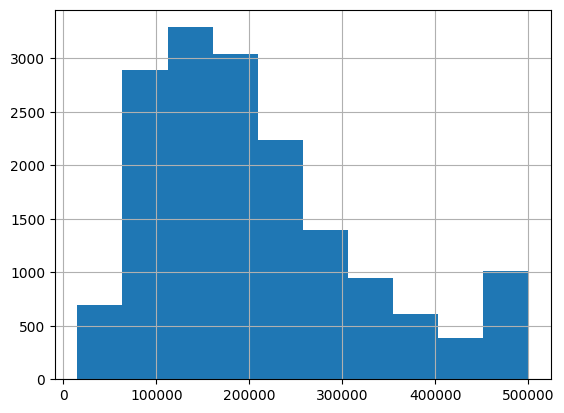

In [46]:
df_labels.hist()

Observamos que hemos obtenido un error de 68.633$. Teniendo en cuenta que la mayória de los valores de la variable objetivo **median_house_values** están comprendidos entre los 80.000$ y los 250.000$ un error de 68.633$, no es muy buen resultado.
Esto puede ser devido a que la características no proporcionan suficiente información para hacer buenas predicciones o que el modelo no es lo suficientemente potente.

Una manera de solventarlo sería seleccionar un modelo más potente o, introducir nuevas características en el algoritmo de entramiento, o reducir las restricciones del modelo. (Cosa que estaría descartada ya que este modelo no está regularizado).

## Aplicar un nuevo modelo: DecisionTreeRegressor

In [47]:
tree_reg = DecisionTreeRegressor() # Creamos la instancia
tree_reg.fit(df_prepared, df_labels) # entreno el modelo

DecisionTreeRegressor()

In [48]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Validación Cruzada

Tras entrenar el modelo y calcular el RECM, observamos como el resultado es **0.0**, es decir, no hay errores en la predicción. El hecho de que el RECM sea 0, suele ser un indicador de **overfiting (sobreajuste)**, es decir que el modelo está memorizando los datos de entrenamiento en lugar de aprender patrones generales que puedan generalizarse a nuevos datos.

En una primera instancia se podria pensar que es buena idea usar los datos del conjunto de pruebas para entrenar el modelo con datos que no conoce, pero esto podría corromper al algoritmo, por lo que es mejor no enseñarle el conjunto de prueba hasta estar seguros que el algoritmo es sólido.

La solución que voy aplicar a este problema es la Validación Cruzada, una técnica que permite evaluar el rendimiento y estimar como se comportaría con datos no vistos durante el entrenamiento.

El siguiente código divide de manera aleatorio el conjunto de entrenamiento en 10 subconjuntos distintos llamados iteraciones y, a continnuación, entrena y evalúa el modelo del árbol de decision 10 veces, eligiendo una iteración diferente cada vez para la evaluación y entrenamiento en las otras 9 iteraciones. El resultado es una matriz que contiene las 10 puntuaciones de la evaluación

In [49]:
# Validación Cruzada para DecisionTreeRegressor
scores = cross_val_score(tree_reg, df_prepared, df_labels,
                        scoring="neg_mean_squared_error", cv=10) # error cuadrático medio negativo, 10 iteraciones

tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    '''Muestra los resultados'''
    print("Puntuación: ", scores) # puntuación en cada una de las iteraciones
    print("Media: ", scores.mean()) # puntuación media
    print("Desviación Estandar: ", scores.std()) # Contra menor sea la std, más consistente será el rendimiento del modelo

# Resultados
display_scores(tree_rmse_scores)

Puntuación:  [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Media:  71432.52332065887
Desviación Estandar:  2696.6824522410743


In [50]:
# Validación Cruzada para LinearRegression
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

# Resultados
display_scores(lin_rmse_scores)

Puntuación:  [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
Media:  69116.4347200802
Desviación Estandar:  2880.6588594759014


- **DecisionTreeRegressor:** La mediana de los errores es de aproximadamente 71,626, y la desviación estándar es de alrededor de 2,725.
- **LinearRegression:** La mediana de los errores es de aproximadamente 69,116, y la desviación estándar es de alrededor de 2,881.

Ambos modelos tienen una mediana de errores similar, pero la desviación estándar de los errores es ligeramente menor en el modelo DecisionTreeRegressor. Esto sugiere que el modelo de árbol de decisión puede tener un rendimiento más consistente entre diferentes subconjuntos de datos en la validación cruzada. Sin embargo, la diferencia en la desviación estándar no es muy significativa.

## Aplicar un nuevo modelo: RandomForestRegressor

Este modelo funciona entrenando muchos árboles de decisiones en subconjuntos aleatorios de las características y haciendo un promedio de sus predicciones.

In [51]:
# Creación modelo RandomForestRegressor
forest_reg = RandomForestRegressor() # creación de la instancia
forest_reg.fit(df_prepared, df_labels)


RandomForestRegressor()

In [52]:
df_pred = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [53]:
# Validación Cruzada para RandomForestRegressor
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                            scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

# Resultados
display_scores(forest_rmse_scores)

Puntuación:  [51340.22553753 49240.079874   46976.40445657 51917.1921677
 47035.53338226 51829.80557131 52841.15437862 49525.18429381
 47962.29506428 54069.20606905]
Media:  50273.7080795117
Desviación Estandar:  2357.685647654302


Observamos como el modelo **RandomForestRegressor** obtenemos un mejor rendimientos que en los dos modelos anteriores. Ahora intentaremos perfeccionar este modelo ajustando los hiperparámetros. Para ello, podríamos hacerlo manualmente o como es el caso, utilizar el módulo **GridSearchCV de Scikit-Learn**
A este módulo le indicaremos con qué hiperparámetro queremos experimentar y que valores debe probar. El módulo utilizará validación ccruzada para evaluar todas las combinaciones posibles de valores de hiperparámetros.

In [59]:
# Definición cuadrícula de hiperparámetros que se van a probar durante la búsqueda
# n_estimators (número de árboles en el bosque)
# max_features (número máximo de características a considerar para dividir en cada nodo)
# otro bloque para probar diferentes combinaciones con la opción bootstrap establecida en False.
param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 4], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor() # Creación de la instancia
# Creación de la instancia de búsqueda con los paámetros definidos en la cuadrícula
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)

# iniciarmos la búsqueda
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 4]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [64]:
grid_search.best_estimator_.feature_importances_

array([7.51541277e-02, 7.10552164e-02, 4.34237389e-02, 1.81195740e-02,
       1.68537192e-02, 1.82887897e-02, 1.59498961e-02, 3.36050933e-01,
       6.57363290e-02, 1.03876633e-01, 6.39625938e-02, 1.29063000e-02,
       1.52396448e-01, 1.18484179e-04, 2.06831710e-03, 4.03890005e-03])

# Evaluar el Conjunto de Prueba

In [67]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


48147.11017335152

Observamos que hemos obtenido un error de 48.147 dolares. Un resultado mucho más faborable que el obtenido con el conjunto de prueba 50.273 dolares **RandomForestRegressor**. Hay que recordar que en nuestra primera medición del rendimiento con el modelo de **LinearRegression** fue de 68.633 dolares, lo que supone una reducción en la desviación de futuras predicciones de 20.486 = (68633 - 48147)